<a href="https://colab.research.google.com/github/manhtuanbn12/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prepare

## 1.1. Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

## 1.2. Downloading Kaggle datasets

In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud

 97% 64.0M/66.0M [00:02<00:00, 42.9MB/s]
100% 66.0M/66.0M [00:02<00:00, 30.8MB/s]


## 1.3. Unzip the data

In [ ]:
! mkdir train 

In [ ]:
! unzip creditcardfraud.zip -d train

Archive:  creditcardfraud.zip
  inflating: train/creditcard.csv    


## 1.4. Read data

In [ ]:
address = './train/creditcard.csv'
df = pd.read_csv(address)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 2. Exploratory Data Analysis

## 2.1. Basic Statistics.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 2.2. Fill the missing entries.

### 2.2.1. Check if there are missing values

In [ ]:
df.isnull().sum().sum()

0

There are no missing values.

## 2.3. Handling categorical columns by one-hot encoding.

In [ ]:
df._get_numeric_data()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## 2.4. Visualizing Class

In [ ]:
class_percentage = df.Class.value_counts()/len(df.Class)*100

In [ ]:
class_percentage

0    99.827251
1     0.172749
Name: Class, dtype: float64

([<matplotlib.patches.Wedge at 0x7fa180ba34d0>,
 [Text(-1.09998380137016, 0.0059696501784341355, ''),
  Text(1.0999838018177286, -0.005969567707642625, '')])

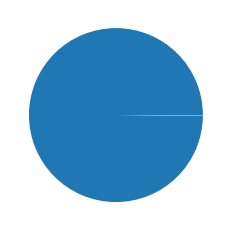

In [ ]:
plt.pie(class_percentage)

In [ ]:
class_output = pd.DataFrame()
class_output['Class'] = [0, 1]
class_output['Percentage'] = [(df['Class'] == 0).sum()/len(df['Class'])*100, (df['Class'] == 1).sum()/len(df['Class'])*100] 

In [ ]:
(df['Class'] == 0).sum()

284315

In [ ]:
class_output

,Class,Percentage
0,0,99.827251
1,1,0.172749


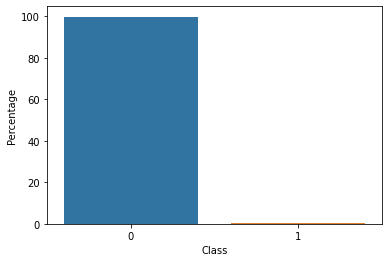

In [ ]:
sns.barplot(data=class_output, x='Class', y='Percentage')

## 2.5. Divide features and labels

In [ ]:
df_features = df.drop(columns = ['Time', 'Amount', 'Class'])
df_label = df['Class']

## 2.6. Correlation Matrix

### 2.6.1. Spearman's rank correlation coefficient.

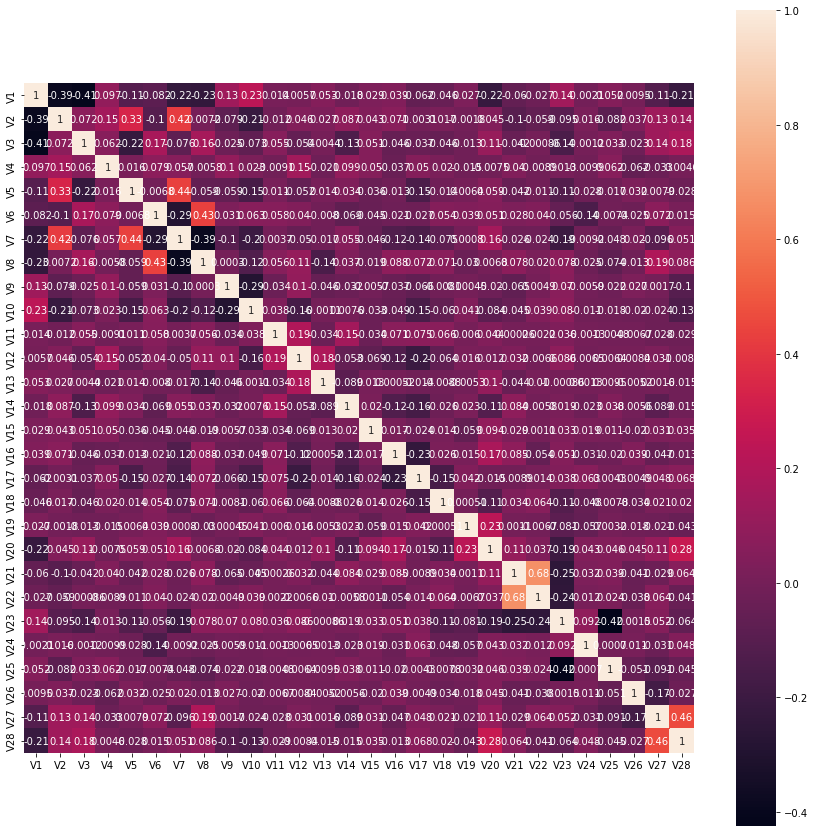

In [ ]:
corr_matrix = df_features.sample(frac=0.25).corr('spearman')

# Plot the heatmap of correlation
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True)
plt.show()

### 2.6.2. Pearson correlation coefficient.

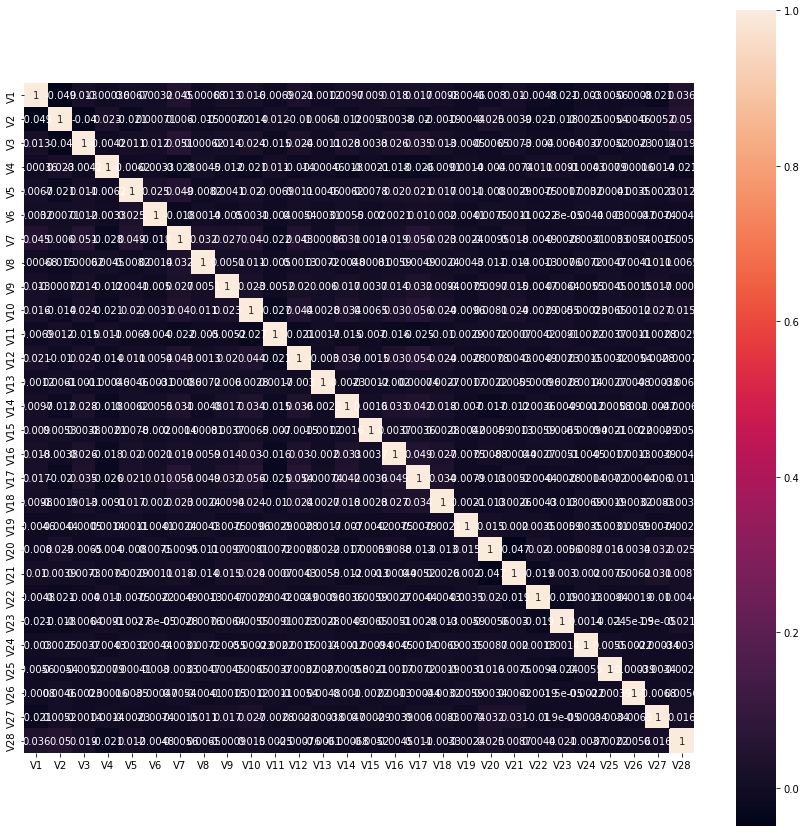

In [ ]:
corr_matrix = df_features.sample(frac=0.25).corr()

# Plot the heatmap of Correlation
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True)
plt.show()

## 2.7. Scale Data

### 2.7.1. Visualize Data Range

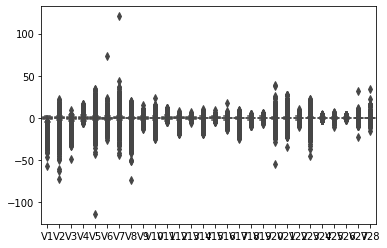

In [ ]:
sns.boxplot(data=df_features)

### 2.7.2. MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_features = scaler.fit_transform(df_features)

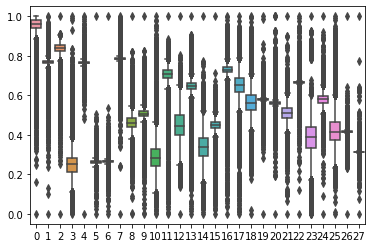

In [ ]:
sns.boxplot(data=df_features)

## 2.8. Imbalanced labels


### 2.8.1. Using SMOTE

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
...
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
df_features, df_label = oversample.fit_resample(df_features, df_label)

In [ ]:
df_label.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

# 3. Train model

## 3.1. Logistic Regression.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_features, df_label, random_state=42, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_lr = lr.predict(x_test)

## 3.2. Decision Tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(x_test)

## 3.3. Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(x_test)

# 4. Classification Reports

## 4.1. Logistic Regression.

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

In [ ]:
precision_lr, recall_lr, threshold_lr = precision_recall_curve(y_test, y_pred_lr)
print("The Area Under the Precision Recall Curve of Logistic Regression method is: \n", auc(precision_lr, recall_lr))

The Area Under the Precision Recall Curve of Logistic Regression method is: 
 0.46563594123445107


## 4.2. Decision Tree.

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

In [ ]:
precision_dt, recall_dt, threshold_dt = precision_recall_curve(y_test, y_pred_dt)
print("The Area Under the Precision Recall Curve of Decision Tree method is: \n", auc(precision_dt, recall_dt))

The Area Under the Precision Recall Curve of Decision Tree method is: 
 0.49756945990480916


## 4.3. Random Forest.

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

In [ ]:
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_test, y_pred_rf)
print("The Area Under the Precision Recall Curve of Random Forest method is: \n", auc(precision_rf, recall_rf))

The Area Under the Precision Recall Curve of Random Forest method is: 
 9.651323986170635e-05


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

